Dataset Preview:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-nu

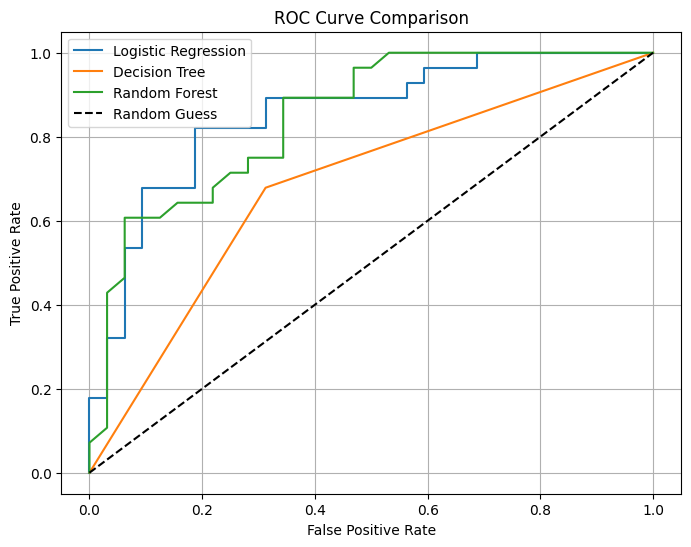


Tuned Random Forest Evaluation:
              precision    recall  f1-score   support

           0       0.76      0.69      0.72        32
           1       0.68      0.75      0.71        28

    accuracy                           0.72        60
   macro avg       0.72      0.72      0.72        60
weighted avg       0.72      0.72      0.72        60



In [ ]:



# ----------------------------
# Importing required libraries
# ----------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For machine learning models and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score, roc_curve

# ----------------------------
# Step 1: Load the dataset
# ----------------------------

df = pd.read_csv("heart_cleveland_upload.csv")  # Ensure this CSV is in the same folder

# Quick look at the data
print("Dataset Preview:")
print(df.head())

# Understanding data types and missing values
print("\nDataset Info:")
print(df.info())

# Let's check how the target variable is distributed
print("\nHeart Condition Counts:")
print(df['condition'].value_counts())  # 0 = No heart disease, 1 = Has heart disease

# ----------------------------
# Step 2: Preprocessing
# ----------------------------

# Encoding categorical features using one-hot encoding
df = pd.get_dummies(df, columns=['cp', 'restecg', 'slope', 'thal'], drop_first=True)

# Standardizing numeric features for better model performance
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# ----------------------------
# Step 3: Splitting data into train and test sets
# ----------------------------

X = df.drop('condition', axis=1)
y = df['condition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------------------------
# Step 4: Model training
# ----------------------------

# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# ----------------------------
# Step 5: Model Evaluation
# ----------------------------

# Custom function to print metrics
def evaluate_model(name, y_test, y_pred):
    print(f"\n{name} Performance:")
    print("Accuracy:", round(accuracy_score(y_test, y_pred), 2))
    print("Precision:", round(precision_score(y_test, y_pred), 2))
    print("Recall:", round(recall_score(y_test, y_pred), 2))
    print("F1 Score:", round(f1_score(y_test, y_pred), 2))

# Evaluating all three models
evaluate_model("Logistic Regression", y_test, log_pred)
evaluate_model("Decision Tree", y_test, dt_pred)
evaluate_model("Random Forest", y_test, rf_pred)

# ----------------------------
# Step 6: ROC Curve Comparison
# ----------------------------

# Getting probability scores
log_probs = log_model.predict_proba(X_test)[:, 1]
dt_probs = dt_model.predict_proba(X_test)[:, 1]
rf_probs = rf_model.predict_proba(X_test)[:, 1]

# Calculating ROC Curve
log_fpr, log_tpr, _ = roc_curve(y_test, log_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

# Plotting all ROC curves
plt.figure(figsize=(8, 6))
plt.plot(log_fpr, log_tpr, label='Logistic Regression')
plt.plot(dt_fpr, dt_tpr, label='Decision Tree')
plt.plot(rf_fpr, rf_tpr, label='Random Forest')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

# ----------------------------
# Step 7: Hyperparameter Tuning (Random Forest)
# ----------------------------

# Trying different settings to improve Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 5, 10]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='f1')
rf_grid.fit(X_train, y_train)

# Evaluating the best model found by GridSearchCV
best_rf = rf_grid.best_estimator_
final_rf_pred = best_rf.predict(X_test)

print("\nTuned Random Forest Evaluation:")
print(classification_report(y_test, final_rf_pred))

# ===================== Explanation =====================

# Step 1: We created a sample patient's data with 13 key health features.
# Step 2: Categorical columns like chest pain type, ECG results, slope, and thal were one-hot encoded
#         to match how we trained the model.
# Step 3: We made sure the sample data has the same column names and order as the training set.
# Step 4: We scaled the numerical features (like age, BP, cholesterol) using the same scaler.
# Step 5: Finally, we used the trained Random Forest model to predict:
#         - The class: 0 = No Heart Disease, 1 = Heart Disease
#         - The probability: How confident the model is in the prediction

# This lets us test the model with any new/fake patient and see what it predicts.


In [13]:
import pandas as pd
import numpy as np

# Sample fake patient data (modify values as needed)
sample_data = {
    'age': [58],
    'sex': [1],
    'cp': [2],
    'trestbps': [140],
    'chol': [230],
    'fbs': [0],
    'restecg': [1],
    'thalach': [150],
    'exang': [0],
    'oldpeak': [1.2],
    'slope': [2],
    'ca': [0],
    'thal': [2]
}

sample_df = pd.DataFrame(sample_data)

# Encode categorical features (same as training)
categorical_cols = ['cp', 'restecg', 'slope', 'thal']
sample_df = pd.get_dummies(sample_df, columns=categorical_cols)

# Align columns with training data
sample_df = sample_df.reindex(columns=X.columns, fill_value=0)

# Scale numeric columns
sample_df[numeric_cols] = scaler.transform(sample_df[numeric_cols])

# Predict using best model
prediction = best_rf.predict(sample_df)
probability = best_rf.predict_proba(sample_df)

print("Predicted Class (0 = No Disease, 1 = Disease):", prediction[0])
print("Prediction Probability (No disease / Disease):", probability[0])


Predicted Class (0 = No Disease, 1 = Disease): 1
Prediction Probability (No disease / Disease): [0.42187357 0.57812643]
